### MPC controller settings

In [1]:
import numpy as np
import scipy.sparse as sparse
from pathlib import Path
import pickle

sim_folder = Path('dos/mpcM2')


# Plant dynamic model matrices
A = np.zeros((42,42))
B = np.identity(42)
nx,nu = A.shape[0], B.shape[1]

# MPC settings
# Prediction horizon
npred = 4
# Weighting matrices
Q = (0.2/npred)*sparse.block_diag([1]*nx)
R = (1/npred)*sparse.block_diag([1]*nu)
# Controller output constraints
dumin, dumax = -0.25*np.ones(nu), 0.25*np.ones(nu)
umin, umax = -2*np.ones(nu), 2*np.ones(nu)

# MPC dictionary
data = {'MPC':{'A':A,'B':B,'Q':Q,'R':R,
              'npred':npred,
               'dumin':dumin,'dumax':dumax,
               'umin':umin,'umax':umax}}
# Pickles MPC data into string representation
with open(sim_folder/'MPC.pickle','wb') as f:
    pickle.dump(data,f)

### Load DOS and define define folder with simulation settings

In [2]:
import dos
sim = dos.DOS(sim_folder)

INFO:DOS:Reading config from dos/mpcM2/dos.yaml
INFO:DOS:New driver: M2
INFO:M2:New input: Txyz
INFO:M2:New input: Rxyz
INFO:DOS:New driver: wfs48
INFO:wfs48:New output: M12_RBM
INFO:wfs48:Output logged in!
INFO:DOS:New driver: MPC
INFO:MPC:New input: wfs48 data
INFO:MPC:New output: M2 Txyz
INFO:MPC:Output logged in!
INFO:MPC:New output: M2 Rxyz
INFO:MPC:Output logged in!
INFO:DOS:New driver: science
INFO:science:New output: wfe_rms
INFO:science:Output logged in!
INFO:science:New output: tiptilt
INFO:science:Output logged in!
INFO:science:New output: segment_tiptilt
INFO:science:Output logged in!
INFO:wfs48 data:Linked to M12_RBM from wfs48
INFO:M2 Txyz:Linked to Txyz from M2
INFO:M2 Rxyz:Linked to Rxyz from M2
INFO:DOS:Simulation setup for a duration of 20s @ 1Hz (20 steps)!


SIMCEO server received: Acknowledging connection from SIMCEO client!


In [3]:
# Start simulation
sim.start()

INFO:DOS:Pushing configuration to server
INFO:M2:GMT
INFO:wfs48:OP0
INFO:science:OP1
INFO:DOS:Initializing
INFO:M2:None
INFO:wfs48:None
INFO:science:None
INFO:DOS:Running
INFO:DOS:Terminating
INFO:M2:GMT deleted!
INFO:wfs48:OpticalPath deleted!
INFO:science:OpticalPath deleted!


Elapsed time: 10.013154029846191


### Plot simulation results
#### Mirror states

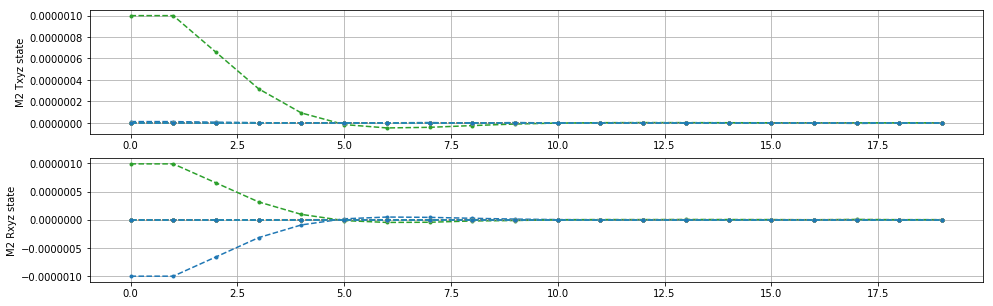

In [5]:
# Plot mirror states
import matplotlib.pyplot as plt

M2_RBM = sim.logs.entries['wfs48']['M12_RBM'].timeSeries
M2_Txyz = M2_RBM[1][:,:21]
M2_Rxyz = M2_RBM[1][:,-21:]

plt.figure(figsize=(16,5))

plt.subplot(211)
plt.plot(M2_RBM[0],M2_Txyz,'.--')
plt.grid(True)
plt.ylabel('M2 Txyz state')
    
plt.subplot(212)
plt.plot(M2_RBM[0],M2_Rxyz,'.--')
plt.grid(True)
plt.ylabel('M2 Rxyz state')
    
plt.show()

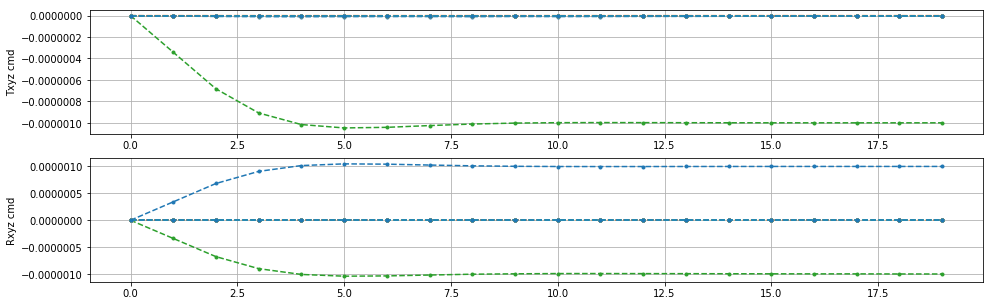

In [22]:
# Plot controller outputs
uTxyz = sim.logs.entries['MPC']['M2 Txyz'].timeSeries
uRxyz = sim.logs.entries['MPC']['M2 Rxyz'].timeSeries

fig = plt.figure(figsize=(16,5))

plt1, plt2 = fig.add_subplot(211), fig.add_subplot(212)

for k in range(7):
    for kk in range(3):
        #Txyz
        plt1.plot(uTxyz[1][k,kk,:],'.--')
        plt1.grid(True)
        plt1.set_ylabel('Txyz cmd')
        plt1.autoscale(enable=True, axis='y')
        #Rxyz
        plt2.plot(uRxyz[1][k,kk,:],'.--')
        plt2.grid(True)
        plt2.set_ylabel('Rxyz cmd')

plt.show()

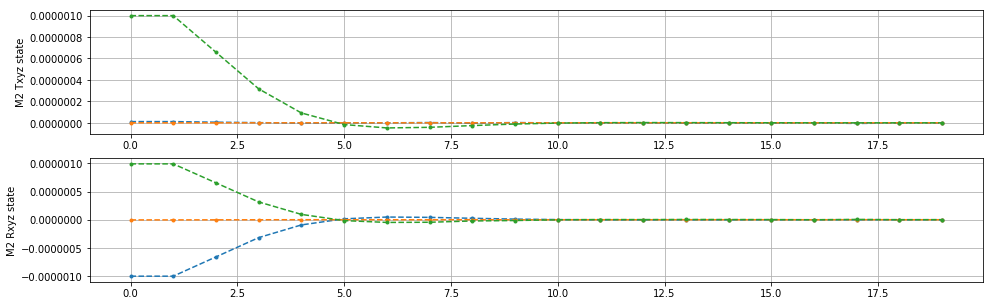

In [8]:
# Plot mirror states
import matplotlib.pyplot as plt

M2_RBM = sim.logs.entries['wfs48']['M12_RBM'].timeSeries
M2_Txyz = M2_RBM[1][:,:3]
M2_Rxyz = M2_RBM[1][:,21:24]

plt.figure(figsize=(16,5))

plt.subplot(211)
plt.plot(M2_RBM[0],M2_Txyz,'.--')
plt.grid(True)
plt.ylabel('M2 Txyz state')
    
plt.subplot(212)
plt.plot(M2_RBM[0],M2_Rxyz,'.--')
plt.grid(True)
plt.ylabel('M2 Rxyz state')
    
plt.show()

SyntaxError: can't use starred expression here (<ipython-input-14-e7c418795e8e>, line 4)